# Customer Behavoir Analytics
## Import libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Load dataset

In [2]:
data = pd.read_csv('IBM Watson Marketing Customer Value Analysis.csv')

In [3]:
data.shape

(9134, 24)

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


 ### EDA on Engaged Customers

### Overall Engagement Rate
### The 'Respose' column shows  whether a customer responded to the marketing effort or not

In [13]:
data.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

### Plot response engagement count

Text(0, 0.5, 'Count')

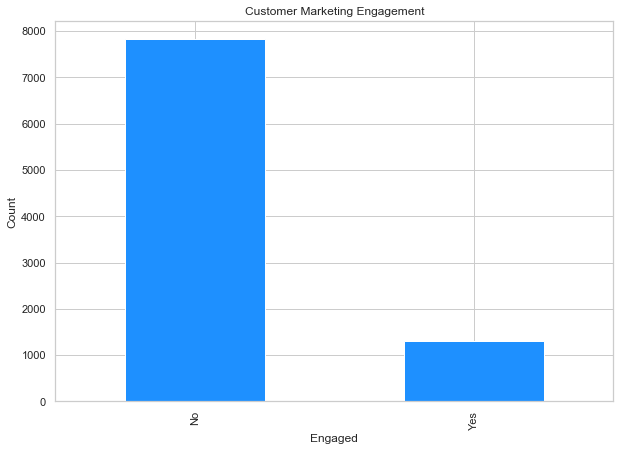

In [39]:
ax = data.groupby('Response').count()['Customer'].plot(kind = 'bar', color = 'dodgerblue',figsize=(10, 7), 
                                                       title='Customer Marketing Engagement')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

### Percentage of the engaged and non-engaged customers

In [27]:
(data.groupby('Response').count()['Customer']/data.shape[0])*100

Response
No     85.679877
Yes    14.320123
Name: Customer, dtype: float64

### _Only about 14% of the customers responded to the marketing efforts_

### Engagement Rates by Offer Type to understand what types of offers worked best for the engaged customers

In [32]:
customers_byoffer = (data.loc[data['Response']=='Yes',].groupby(['Renew Offer Type']).count()['Customer']/data.groupby(['Renew Offer Type']).count()['Customer'])*100
customers_byoffer

Renew Offer Type
Offer1    15.831557
Offer2    23.376623
Offer3     2.094972
Offer4          NaN
Name: Customer, dtype: float64

In [36]:
data.groupby(['Renew Offer Type']).count()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Renew Offer Type,,,,,,,,,,,,,,,,,,,,,,,
Offer1,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752
Offer2,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926
Offer3,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432
Offer4,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024


### Visulize the count by offer type

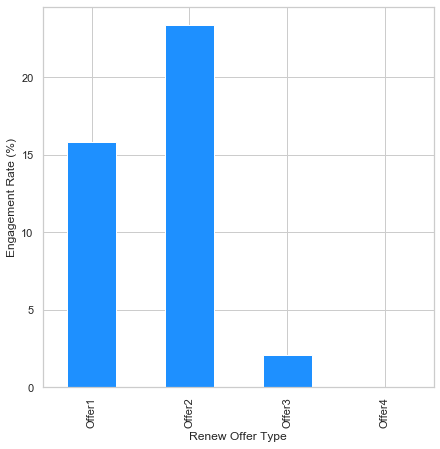

In [40]:
ax = (customers_byoffer).plot(kind = 'bar',figsize=(7, 7),color = 'dodgerblue')

ax.set_ylabel('Engagement Rate (%)')

plt.show()

### _Offer 2 has the highest engagement rate among the customers_

### Offer Type and Vehicle Class

In [54]:
customer_vehicle_offer = ((data.loc[data['Response'] == 'Yes' ].groupby(['Renew Offer Type', 
'Vehicle Class']).count()['Customer'] / data.groupby('Renew Offer Type').count()['Customer'])*100)
customer_vehicle_offer

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car     7.036247
                  Luxury Car        0.159915
                  Luxury SUV        0.479744
                  SUV               4.477612
                  Sports Car        1.119403
                  Two-Door Car      2.558635
Offer2            Four-Door Car    11.483254
                  Luxury Car        0.205058
                  Luxury SUV        0.410116
                  SUV               4.101162
                  Sports Car        1.640465
                  Two-Door Car      5.536569
Offer3            Four-Door Car     1.675978
                  Two-Door Car      0.418994
Name: Customer, dtype: float64

In [55]:
customer_vehicle_offer = customer_vehicle_offer.unstack().fillna(0)
customer_vehicle_offer

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,7.036247,0.159915,0.479744,4.477612,1.119403,2.558635
Offer2,11.483254,0.205058,0.410116,4.101162,1.640465,5.536569
Offer3,1.675978,0.000000,0.000000,0.000000,0.000000,0.418994


### Visualize customer_vehicle_offer

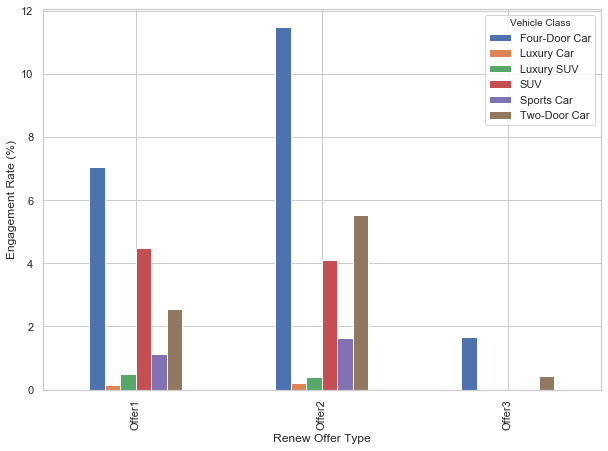

In [56]:
ax = (customer_vehicle_offer).plot(kind = 'bar',figsize=(10, 7), grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

 _We can see that customers with Four Door Car respond more to all offer types. From the 'Engagement Rates by Offer Type' section we know that offer 2 has the most responses. Also those with 'Luxury SUV' respond with to offer 1 more than offer 2. With this we draw insights to know which offer to present to customers based on their vehicale class_

### Engagement Rates by Sales Channel

In [57]:
cusomer_by_sales = (data.loc[data['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer'] / data.groupby('Sales Channel').count()['Customer'])*100
cusomer_by_sales

Sales Channel
Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
Name: Customer, dtype: float64

### Visualize the data customer_by_sales

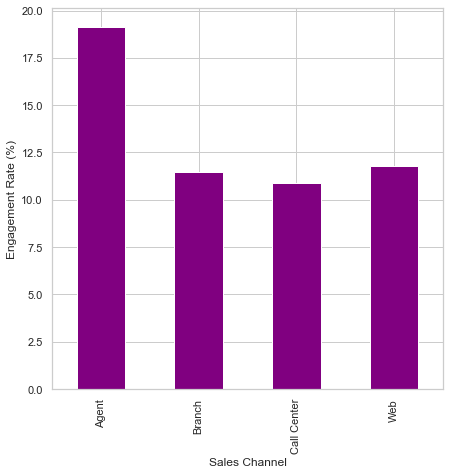

In [62]:
ax = (cusomer_by_sales).plot(kind = 'bar', figsize = (7, 7), color='purple',grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

_We can see that Agent sales channel works better than forms in terms of getting responses from customers. Web sales works second best_

### Sales Channel and Vehicle Size

In [63]:
customer_bysales_vehicle = (data.loc[data['Response']=='Yes'].groupby(['Sales Channel', 
                'Vehicle Size']).count()['Customer'] / data.groupby('Sales Channel').count()['Customer'])*100
customer_bysales_vehicle

Sales Channel  Vehicle Size
Agent          Large            2.070751
               Medsize         14.495255
               Small            2.588438
Branch         Large            2.103623
               Medsize          7.479548
               Small            1.869887
Call Center    Large            1.359773
               Medsize          6.798867
               Small            2.719547
Web            Large            1.358491
               Medsize          9.509434
               Small            0.905660
Name: Customer, dtype: float64

In [65]:
customer_bysales_vehicle = customer_bysales_vehicle.unstack().fillna(0)
customer_bysales_vehicle

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,2.070751,14.495255,2.588438
Branch,2.103623,7.479548,1.869887
Call Center,1.359773,6.798867,2.719547
Web,1.358491,9.509434,0.905660


### Visualize customer_bysales_vehicle

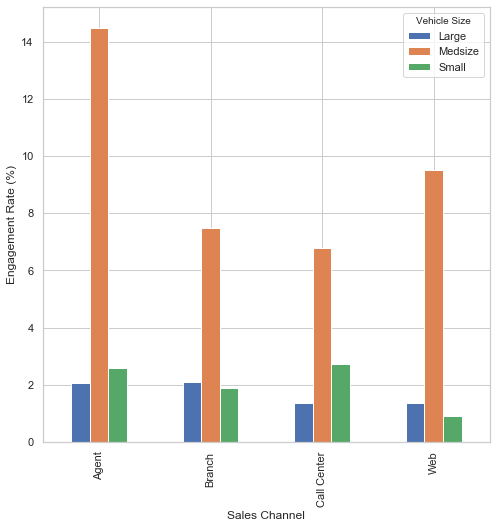

In [67]:
ax = customer_bysales_vehicle.plot(kind = 'bar', figsize = (8, 8), grid = True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

_Customers with medium size vehicles respond the best to all sales channels_

### Engagement Rates by Months Since Policy Inception

In [68]:
customer_bymonths_inception = (data.loc[data['Response']=='Yes'].groupby(
'Months Since Policy Inception')['Response'].count() / data.groupby(
'Months Since Policy Inception')['Response'].count())*100

customer_bymonths_inception.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
30    12.121212
31    11.320755
32    12.500000
33     0.000000
34     5.504587
35    11.009174
36    13.333333
37     5.825243
38    21.818182
39    14.117647
40    20.224719
41    20.689655
42     6.382979
43    27.522936
44    20.869565
45    12.371134
46     6.451613
47    12.371134
48    12.903226
49     6.976744
50    24.000000
51    12.765957
52    16.981132
53     7.792208
54    25.806452
55    13.636364
56    32.142857
57     0.000000
58     7.894737
59    33.802817
60     7.6

### Visualizing the data

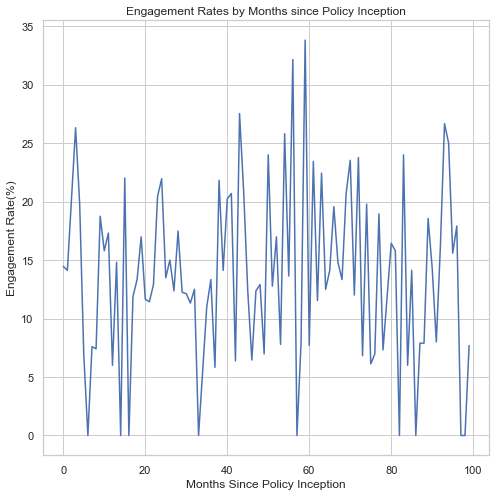

In [71]:
ax = customer_bymonths_inception.fillna(0).plot(figsize = (8, 8), 
title = 'Engagement Rates by Months since Policy Inception', grid=True)
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate(%)')
plt.show()

### Customer Segmentation by CLV & Months Since Policy Inception
### Distribution of CLV

In [72]:
data['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

_Define those customers with a CLV higher than the median as high-CLV customers, and those with a CLV lower than the median as low-CLV customers_

In [73]:
data['CLV Segment'] = data['Customer Lifetime Value'].apply(lambda x: 'High' if x > data['Customer Lifetime Value'].median() else 'Low')

In [74]:
data['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [75]:
data['Policy Age Segment'] = data['Months Since Policy Inception'].apply(lambda x: 'High' if x> data['Months Since Policy Inception'].median() else 'Low')

In [76]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


### Visualize these segments

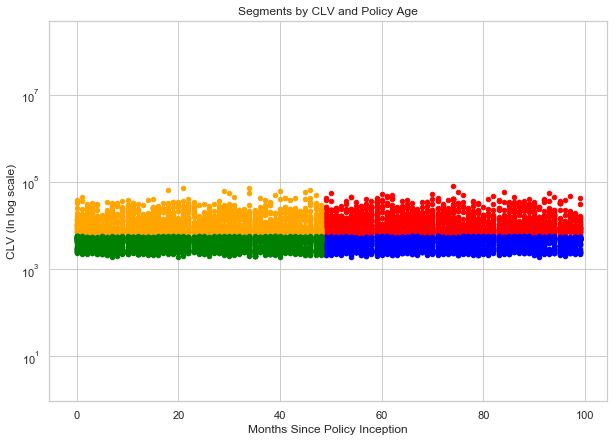

In [77]:
# High CLV and High Inception
ax = data.loc[(data['CLV Segment'] == 'High') & 
(data['Policy Age Segment'] == 'High')].plot.scatter(x = 'Months Since Policy Inception', y='Customer Lifetime Value', logy = True,color='red')

# Low CLV and High Inception
data.loc[(data['CLV Segment'] == 'Low') 
& (data['Policy Age Segment'] == 'High') ].plot.scatter(ax = ax, x='Months Since Policy Inception',y ='Customer Lifetime Value', logy=True,color='blue')

# High CLV and Low Inception
data.loc[(data['CLV Segment'] == 'High') 
& (data['Policy Age Segment'] == 'Low')].plot.scatter(ax =ax,x= 'Months Since Policy Inception',y = 'Customer Lifetime Value', logy=True,color='orange')

# Low CLV and Low Inception
data.loc[(data['CLV Segment'] == 'Low') 
& (data['Policy Age Segment'] == 'Low')].plot.scatter(ax =ax,x= 'Months Since Policy Inception',y = 'Customer Lifetime Value', logy = True, color = 'green', grid = True, figsize=(10,7))

ax.set_ylabel('CLV (In log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

### Check noticeable difference in the engagement rate among these

In [79]:
engagement_rates_by_segment = (data.loc[data['Response']=='Yes'].groupby(['CLV Segment',
'Policy Age Segment']).count()['Customer']/data.groupby(['CLV Segment','Policy Age Segment']).count()['Customer'])*100

engagement_rates_by_segment

CLV Segment  Policy Age Segment
High         High                  13.872832
             Low                   13.206733
Low          High                  16.245007
             Low                   13.995680
Name: Customer, dtype: float64

### Visualizing the segments

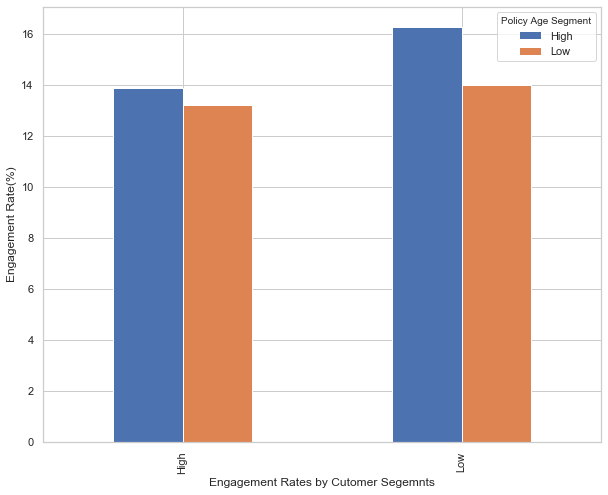

In [80]:
ax = (engagement_rates_by_segment.unstack()).plot(kind = 'bar', figsize = (10, 8), grid=True)

ax.set_ylabel('Engagement Rate(%)')
ax.set_xlabel('Engagement Rates by Cutomer Segemnts')

plt.show()

_We can notice that High Policy Age Segment has higher engagement than the Low Policy Age
Segment. This suggests that those customers who have been insured by this company longer respond better. 
Moreover, the High Policy Age and Low CLV segment has the highest engagement rate among the four segments_

_By creating different customer segments based on customer attributes, we can better understand how different groups of customers behave differently_